# **Placement Assignment Python Module 
## Submitted by Abhinav Dwivedi**

### Question1-) Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.
### Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.
### Example input - string = “write write write all the number from from from 1 to 100”
### Example output - 5
### Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5

In [31]:
# taking string as an input
string=str(input("Enter your string: "))
# creating a function to count the frequency of each word in string
def count_words(string):
  splitt=string.split()  #splitting the string
  frequency={} # defining a tuple to store the frequency of repeated word

  for word in splitt:  # using for loop for checking the frequency
    if word in frequency:
      frequency[word] +=1
    else:
      frequency[word] = 1
  
  max_freq=max(frequency.values())  # storing the value of repeated word
  repeated_words=[word for word, frequency in frequency.items() if frequency==max_freq]
  max_len=len(repeated_words[0]) # storing the length of the repeated word
  return max_len  # returning the length of the repeated word

Enter your string: write write write all the number from from from 1 to 100


In [32]:
count_words(string)

5

In [3]:
string="explain the explain the explain fact"

In [4]:
count_words(string)

7

Question 2: -
Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if
he can remove just one character at the index in the string, and the remaining characters will occur the same
number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .
Note - You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.
#### Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 }
#### Example output 1- YES
#### Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 }
#### Example output 2 - NO


In [5]:
string=str(input("Enter the string: "))
# creating a function to count the frequency of character in a string entered
def count_freq(string):
  freq={}
# using for loop to count the frequency of each character in the string
  for char in string:
    if char in freq:
      freq[char] +=1
    else:
      freq[char]=1
  values=list(freq.values())
  unique_char=set(values)

  if len(unique_char)==1:
    return "YES"  # if all the characters have same frequency
  if len(unique_char)==2:
    max_count=max(unique_char)
    min_count=min(unique_char)

    if values.count(max_count)==1 and max_count-min_count==1:
      return "YES"
    
  return "NO"


Enter the string: abccc


**TEST CASE 1**
## -> In the above test case, the number of occourance of 'c' is three times and if one of the c is being removed then too, two occourances remain there, hence the output is 'NO'

In [6]:
count_freq(string)

'NO'

**TEST CASE 2**
## -> In the below test case, the number of occourance of 'c' is two times and if one of the c is being removed then only one occourance is there, hence the output is 'YES'

In [7]:
string="abcc"  

In [8]:
count_freq(string)

'YES'

**TEST CASE 3**
## -> In the below test case, the number of occourance of 'c' is one time and hence the output is 'YES'

In [9]:
string="abc"

In [10]:
count_freq(string)

'YES'

### Question 3: - Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format.
### Note - Write comments wherever necessary explaining the code written.
### Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json
### Data Attributes - 
### id: Identification Number - int num: Number of the
### ● Pokémon in the official Pokédex - int name: Pokémon name -
### ● string img: URL to an image of this Pokémon - string type:
### ● Pokémon type -string height: Pokémon height - float
### ● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given
### ● when transferred - string candy_count: the amount of candies required to evolve
### - int
### ● egg: Number of kilometers to travel to hatch the egg - float spawn_chance:
### ● Percentage of spawn chance (NEW) - float avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int
### ● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of
### ● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict


In [11]:
import requests
import pandas as pd

# creating funtion to download the data from the url
def download_data(url):
  response= requests.get(url)
  if response.status_code == 200:
    return response.json()
  else:
    raise Exception("Error loading json file")

# creating a function to convert the data into dataframe
def convert_into_dataframe(data):
  pokemon_list= data['pokemon']

  rows=[]  # creating rows as a list to store the values
  for pokemon in pokemon_list:
    id = pokemon["id"]
    num = pokemon["num"]
    name = pokemon["name"]
    img = pokemon["img"]
    types = ",".join(pokemon["type"])
    height = pokemon["height"]
    weight = pokemon["weight"]
    candy = pokemon.get("candy", "")
    candy_count = pokemon.get("candy_count", 0)
    egg = pokemon.get("egg", "")
    spawn_chance = pokemon.get("spawn_chance", 0.0)
    avg_spawns = pokemon.get("avg_spawns", 0)
    spawn_time = pokemon.get("spawn_time", "")
    weaknesses = ",".join(pokemon.get("weaknesses", 0.0))
    multipliers = pokemon.get("multipliers", [])
    next_evolution = pokemon.get("next_evolution", [])
    prev_evolution = pokemon.get("prev_evolution", [])

    rows.append([id, num, name, img, types, height, weight, candy, candy_count, egg,
                     spawn_chance, avg_spawns, spawn_time, weaknesses, multipliers, next_evolution, prev_evolution])
    
  columns = ["id", "num", "name", "img", "type", "height", "weight", "candy", "candy_count",
               "egg", "spawn_chance", "avg_spawns", "spawn_time", "weaknesses","multipliers",
               "next_evolution", "prev_evolution"]
  
  df = pd.DataFrame(rows, columns=columns)

  return df

# creating a function to export the dataframe into the excel format
def export_to_excel(df, output_file):
  df.to_excel(output_file, index=False)

# Defining the url and the output file name
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
output_file = "pokemon_data.xlsx"

# Download the data from the URL
data = download_data(url)

# Convert the data to a DataFrame
df = convert_into_dataframe(data)

# Export the DataFrame to Excel
export_to_excel(df, output_file)

print("Data exported to", output_file)


Data exported to pokemon_data.xlsx


In [12]:
pd.read_excel('pokemon_data.xlsx').head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weaknesses,multipliers,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire,Ice,Flying,Psychic",[1.58],"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",[]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire,Ice,Flying,Psychic","[1.2, 1.6]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire,Ice,Flying,Psychic",NaN,[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water,Ground,Rock",[1.65],"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water,Ground,Rock",[1.79],"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


#### Question 4 - Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.
#### Link - https://data.nasa.gov/resource/y77d-th95.json
#### Note - Write code comments wherever needed for code understanding

#### Excepted Output Data Attributes
#### ● Name of Earth Meteorite - string id - ID of Earth
#### ● Meteorite - int nametype - string recclass - string
#### ● mass - Mass of Earth Meteorite - float year - Year at which Earth
#### ● Meteorite was hit - datetime format reclat - float recclong - float
#### ● point coordinates - list of int


In [13]:
import requests
import pandas as pd

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data")

def convert_to_dataframe(data):
    df = pd.DataFrame(data)

    # Select the desired columns
    columns = ["name", "id", "nametype", "recclass", "mass", "year", "reclat", "reclong"]
    df = df[columns]

    # Rename the columns
    df.columns = ["Name of Earth Meteorite", "id", "nametype", "recclass", "mass", "year", "reclat", "reclong"]

    return df

def export_to_csv(df, output_file):
    df.to_csv(output_file, index=False)

# Main program
url = "https://data.nasa.gov/resource/y77d-th95.json"
output_file = "meteorite_data.csv"

# Download the data from the URL
data = download_data(url)

# Convert the data to a DataFrame
df = convert_to_dataframe(data)

# Export the DataFrame to CSV
export_to_csv(df, output_file)

print("Data exported to", output_file)

Data exported to meteorite_data.csv


In [14]:
pd.read_csv("meteorite_data.csv").head()

,Name of Earth Meteorite,id,nametype,recclass,mass,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,1880-01-01T00:00:00.000,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,1951-01-01T00:00:00.000,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,1952-01-01T00:00:00.000,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01T00:00:00.000,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,1902-01-01T00:00:00.000,-33.16667,-64.95000


#### Question 5 -Write a program to download the data from the given API link and then extract the following data withproper formatting
#### Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes
#### Note - Write proper code comments wherever needed for the code understanding.
#### Excepted Output Data Attributes -
#### ● id - int url - string
#### ● name - string season
#### ● - int number - int
#### ● type - string airdate -
#### ● date format airtime -
#### ● 12-hour time format
#### ● runtime - float
#### ● average rating - float
#### ● summary - string
#### ● without html tags
#### ● medium image link - string
#### ● Original image link - string

In [15]:
import requests
import json
from bs4 import BeautifulSoup

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Failed to download data")

def extract_data(data):
    show_id = data["id"]
    show_url = data["url"]
    show_name = data["name"]

    episodes = data["_embedded"]["episodes"]

    extracted_data = []
    for episode in episodes:
        episode_id = episode["id"]
        episode_url = episode["url"]
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_type = episode["type"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_average_rating = episode["rating"]["average"]
        episode_summary = BeautifulSoup(episode["summary"], "html.parser").get_text()
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        extracted_data.append([episode_id, episode_url, episode_season, episode_number, episode_type,
                               episode_airdate, episode_airtime, episode_runtime, episode_average_rating,
                               episode_summary, episode_image_medium, episode_image_original])

    return show_id, show_url, show_name, extracted_data

# Main program
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Download the data from the API
data = download_data(url)

# Extract the desired data attributes
show_id, show_url, show_name, extracted_data = extract_data(data)

# Print the extracted data attributes
print("Show ID:", show_id)
print("Show URL:", show_url)
print("Show Name:", show_name)
print("")

for episode_data in extracted_data:
    episode_id, episode_url, episode_season, episode_number, episode_type, episode_airdate, episode_airtime, \
    episode_runtime, episode_average_rating, episode_summary, episode_image_medium, episode_image_original = episode_data

    print("Episode ID:", episode_id)
    print("Episode URL:", episode_url)
    print("Season:", episode_season)
    print("Episode Number:", episode_number)
    print("Type:", episode_type)
    print("Airdate:", episode_airdate)
    print("Airtime:", episode_airtime)
    print("Runtime:", episode_runtime)
    print("Average Rating:", episode_average_rating)
    print("Summary:", episode_summary)
    print("Medium Image Link:", episode_image_medium)
    print("Original Image Link:", episode_image_original)
    print("")

Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld

Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Season: 1
Episode Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg

Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Season: 1
Episode Number: 2
Type: regular
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Ave

#### Question 6 -Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.Draw plots to demonstrate the analysis for the following questions for better visualizations.
#### Write code comments wherever required for code understanding
#### Insights to be drawn -
#### ● Get all Pokemons whose spawn rate is less than 5%
#### ● Get all Pokemons that have less than 4 weaknesses
#### ● Get all Pokemons that have no multipliers at all
#### ● Get all Pokemons that do not have more than 2 evolutions
#### ● Get all Pokemons whose spawn time is less than 300 seconds.
#### Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
#### ● Get all Pokemon who have more than two types of capabilities

In [16]:
dataset=pd.read_excel('pokemon_data.xlsx')

In [17]:
dataset.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weaknesses,multipliers,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass,Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire,Ice,Flying,Psychic",[1.58],"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",[]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass,Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire,Ice,Flying,Psychic","[1.2, 1.6]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass,Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire,Ice,Flying,Psychic",NaN,[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water,Ground,Rock",[1.65],"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water,Ground,Rock",[1.79],"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [18]:
dataset.isna().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count        0
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         6
weaknesses         0
multipliers       81
next_evolution     0
prev_evolution     0
dtype: int64

In [19]:
dataset['spawn_time']=dataset['spawn_time'].dropna().inplace=True

In [20]:
dataset.isna().sum()

id                 0
num                0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count        0
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         0
weaknesses         0
multipliers       81
next_evolution     0
prev_evolution     0
dtype: int64

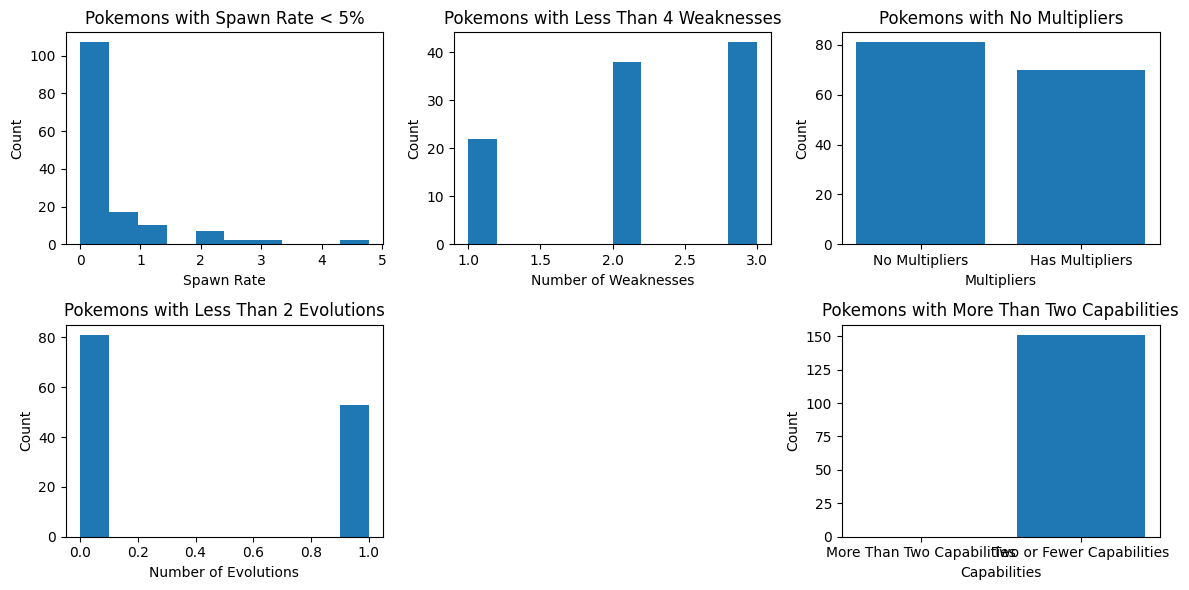

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
# Download the data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = json.loads(response.text)

# Convert the data into a DataFrame
df = pd.DataFrame(data["pokemon"])
df['spawn_time']=df['spawn_time'].dropna().inplace=True


# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_threshold = 5
less_than_threshold = df[df["spawn_chance"] < spawn_rate_threshold]

# Get all Pokemons that have less than 4 weaknesses
max_weaknesses = 4
less_than_max_weaknesses = df[df["weaknesses"].apply(lambda x: len(x)) < max_weaknesses]

# Get all Pokemons that have no multipliers at all

no_multipliers = df[df["multipliers"].apply(lambda x: len(x) if x is not None else 0) == 0]


# Get all Pokemons that do not have more than 2 evolutions
max_evolutions = 2
less_than_max_evolutions = df[df["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) and x is not None else 0) < max_evolutions]


# Get all Pokemons whose spawn time is less than 300 seconds
max_spawn_time = 300
less_than_max_spawn_time = df[df["spawn_time"] < max_spawn_time]

# Get all Pokemon who have more than two types of capabilities
min_capabilities = 2
more_than_min_capabilities = df[df["type"].apply(lambda x: len(x)) > min_capabilities]

# Plotting the analysis results
plt.figure(figsize=(12, 6))

# Plot 1: Pokemons with spawn rate less than 5%
plt.subplot(231)
plt.hist(less_than_threshold["spawn_chance"], bins=10)
plt.xlabel("Spawn Rate")
plt.ylabel("Count")
plt.title("Pokemons with Spawn Rate < 5%")

# Plot 2: Pokemons with less than 4 weaknesses
plt.subplot(232)
plt.hist(less_than_max_weaknesses["weaknesses"].apply(lambda x: len(x)), bins=10)
plt.xlabel("Number of Weaknesses")
plt.ylabel("Count")
plt.title("Pokemons with Less Than 4 Weaknesses")

# Plot 3: Pokemons with no multipliers
plt.subplot(233)
plt.bar(["No Multipliers", "Has Multipliers"], [len(no_multipliers), len(df) - len(no_multipliers)])
plt.xlabel("Multipliers")
plt.ylabel("Count")
plt.title("Pokemons with No Multipliers")

# Plot 4: Pokemons with less than 2 evolutions
plt.subplot(234)
plt.hist(less_than_max_evolutions["next_evolution"].apply(lambda x: len(x) if isinstance(x, list) else 0), bins=10)
plt.xlabel("Number of Evolutions")
plt.ylabel("Count")
plt.title("Pokemons with Less Than 2 Evolutions")

# plot 5: 
## Convert spawn_time to string and split into minutes and seconds
#df[['spawn_minutes', 'spawn_seconds']] = df['spawn_time'].str.split(':', expand=True)
#df['spawn_minutes'] = df['spawn_minutes'].astype(int)
#df['spawn_seconds'] = df['spawn_seconds'].astype(int)

# Convert spawn time to seconds
#df['spawn_seconds'] = df['spawn_minutes'] * 60 + df['spawn_seconds']

# Get all Pokemons whose spawn time is less than 300 seconds
#max_spawn_time = 300
#less_than_max_spawn_time = df[df["spawn_seconds"] < max_spawn_time]

# Get all Pokemon who have more than two types of capabilities
#min_capabilities = 2
#more_than_min_capabilities = df[df["type"].apply(lambda x: len(x)) > min_capabilities]

# Plotting the analysis results
#plt.figure(figsize=(12, 6))

# Plot 5: Pokemons with spawn time less than 300 seconds
#plt.subplot(235)
#plt.hist(less_than_max_spawn_time["spawn_seconds"], bins=10)
#plt.xlabel("Spawn Time (Seconds)")
#plt.ylabel("Count")
#plt.title("Pokemons with Spawn Time < 300 Seconds")


# Plot 6: Pokemons with more than two types of capabilities
plt.subplot(236)
plt.bar(["More Than Two Capabilities", "Two or Fewer Capabilities"], [len(more_than_min_capabilities), len(df) - len(more_than_min_capabilities)])
plt.xlabel("Capabilities")
plt.ylabel("Count")
plt.title("Pokemons with More Than Two Capabilities")

plt.tight_layout()
plt.show()


##Question 7 - Using the data from Question 4, write code to analyze the data and answer the following questions Note -
## 1. Draw plots to demonstrate the analysis for the following questions for better visualizations
##2. Write code comments wherever required for code understanding
##Insights to be drawn -
###● Get all the Earth meteorites that fell before the year 2000
###● Get all the earth meteorites co-ordinates who fell before the year 1970
###● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

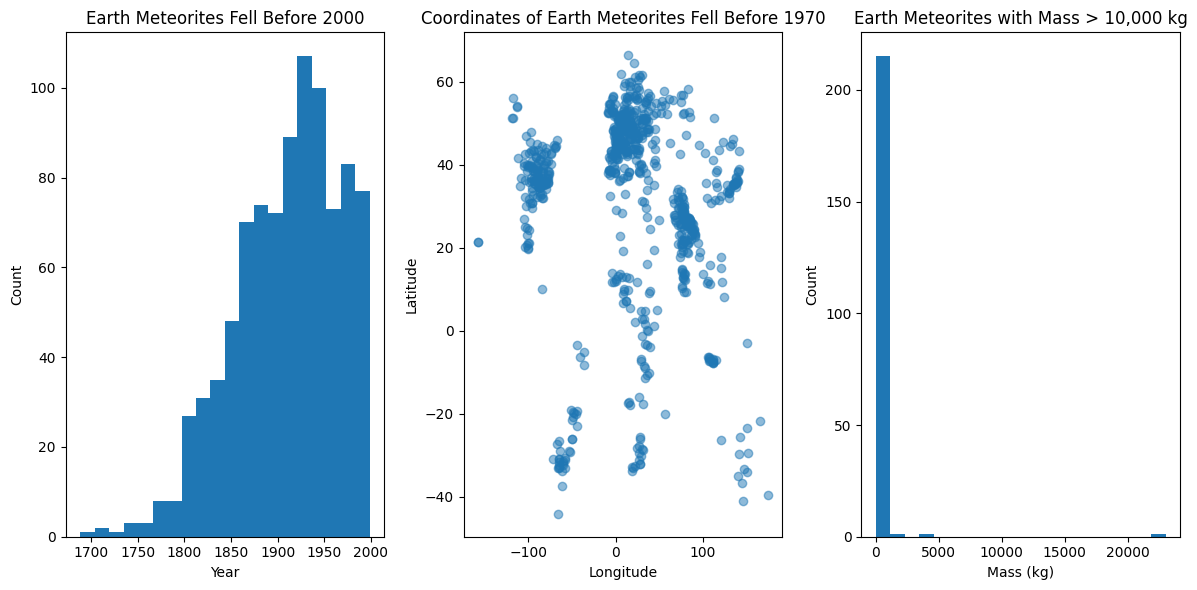

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('meteorite_data.csv')
df['year'] = pd.to_datetime(df['year'], errors='coerce') #error argument is passed as coerce , then invalid parsing will be set as NaN
before_2000 = df[df['year'].dt.year < 2000]
before_1970_coords = before_2000[before_2000['year'].dt.year < 1970][['reclat', 'reclong']]
mass_above_10000 = before_2000[before_2000['mass'] > 10000]
plt.figure(figsize=(12, 6))

# Plot 1: Earth meteorites fell before the year 2000
plt.subplot(131)
plt.hist(before_2000['year'].dt.year, bins=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites Fell Before 2000')

# Plot 2: Coordinates of Earth meteorites fell before the year 1970
plt.subplot(132)
plt.scatter(before_1970_coords['reclong'], before_1970_coords['reclat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Earth Meteorites Fell Before 1970')

# Plot 3: Earth meteorites with mass > 10,000 kg
plt.subplot(133)
plt.hist(mass_above_10000['mass'] / 1000, bins=20)
plt.xlabel('Mass (kg)')
plt.ylabel('Count')
plt.title('Earth Meteorites with Mass > 10,000 kg')

plt.tight_layout()
plt.show()


## Question 8 -Using the data from Question 5, write code the analyze the data and answer the following questions Note -
## 1. Draw plots to demonstrate the analysis for the following questions and better visualizations
## 2. Write code comments wherever required for code understanding
## Insights to be drawn -
### ● Get all the overall ratings for each season and using plots compare the ratings for all theseasons, like season 1 ratings, season 2, and so on.
### ● Get all the episode names, whose average rating is more than 8 for every season
### ● Get all the episode names that aired before May 2019
### ● Get the episode name from each season with the highest and lowest rating
### ● Get the summary for the most popular ( ratings ) episode in every season

In [38]:
# Unattempted 


## Question 9 -Write a program to read the data from the following link, perform data analysis and answer the following questions
## Note -
## 1. Write code comments wherever required for code understanding
## Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
## Insights to be drawn -
### ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
### ● Get all TESLA cars with the model year, and model type made in Bothell City.
### ● Get all the cars that have an electric range of more than 100, and were made after 2015
### ● Draw plots to show the distribution between city and electric vehicle type

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [24]:
cafve=df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != "Clean Alternative Fuel Vehicle Eligible"]
cafve[['Make','Electric Vehicle Type']]

,Make,Electric Vehicle Type
6,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
11,TESLA,Battery Electric Vehicle (BEV)
14,FORD,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...
130437,BMW,Plug-in Hybrid Electric Vehicle (PHEV)
130438,TESLA,Battery Electric Vehicle (BEV)
130439,NISSAN,Battery Electric Vehicle (BEV)
130440,TESLA,Battery Electric Vehicle (BEV)


In [25]:
# Get all TESLA cars with the model year, and model type made in Bothell City.
df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
39,5YJ3E1EA6L,Snohomish,Bothell,WA,98012.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,21.0,127506886,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
217,5YJ3E1EB9N,King,Bothell,WA,98011.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,195097472,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
218,7SAYGDEEXN,Snohomish,Bothell,WA,98012.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,205456996,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
222,5YJ3E1EB6J,King,Bothell,WA,98011.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,200733662,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
292,5YJXCBE40H,King,Bothell,WA,98011.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,1.0,229900653,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129778,5YJ3E1EB3K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,176326356,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
129954,5YJ3E1EB3M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,137418676,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
129976,5YJSA1S10E,Snohomish,Bothell,WA,98021.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,1.0,171609553,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
130295,5YJ3E1EA8N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,211349001,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


In [26]:
# Get all the cars that have an electric range of more than 100, and were made after 2015
df[(df['Electric Range'] >100) & (df['Model Year']>2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


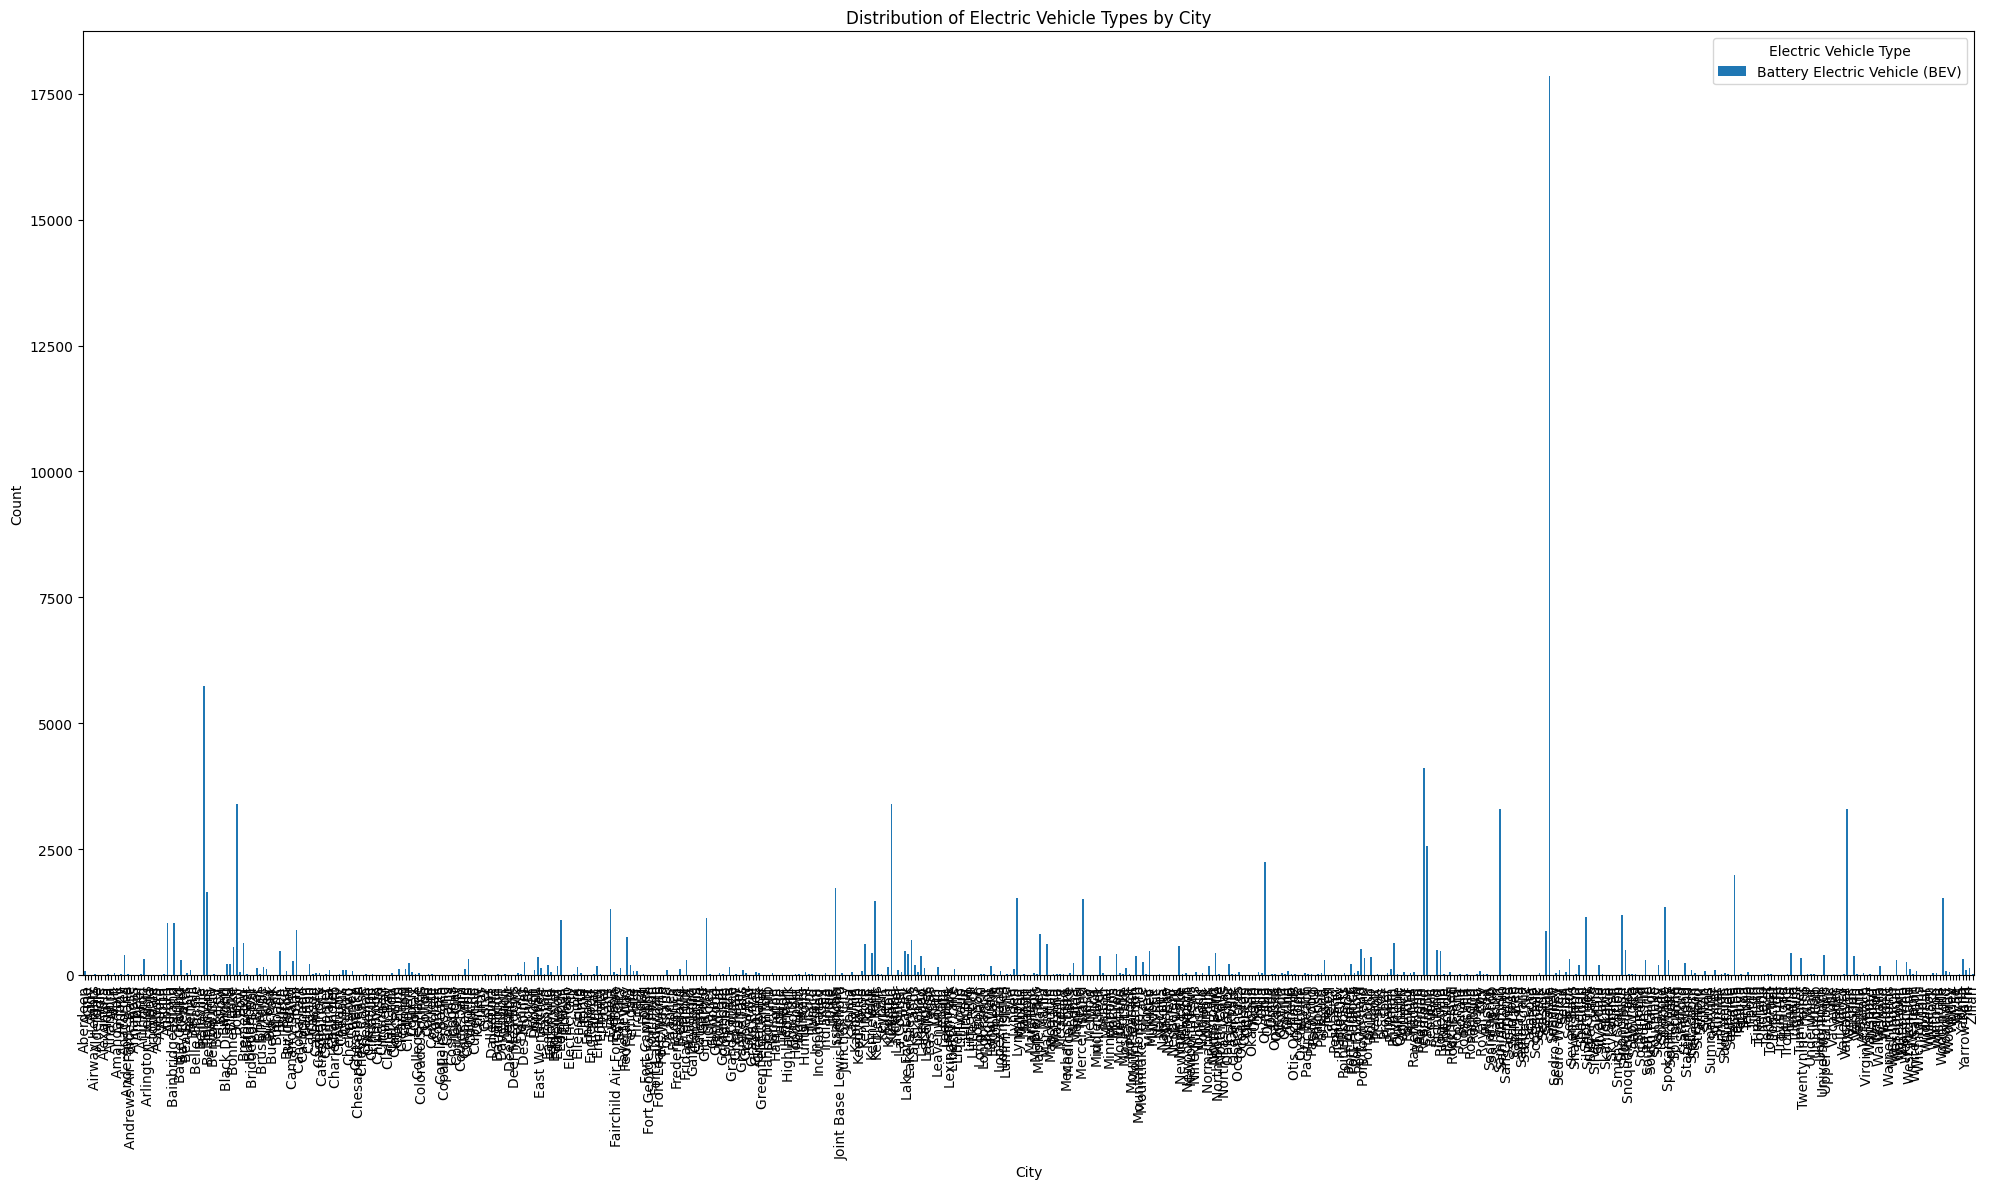

In [37]:
#● Draw plots to show the distribution between city and electric vehicle type
# Filter the DataFrame to include only Battery Electric Vehicles (BEV)
electric_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

# Count the occurrences of each city and electric vehicle type
distribution = electric_df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

# Plot the distribution as a bar plot
ax = distribution.plot(kind='bar', stacked=True,figsize=(20,12))

# Set the plot title and labels
ax.set_title('Distribution of Electric Vehicle Types by City')
ax.set_xlabel('City')
ax.set_ylabel('Count')

# Autoformat the figure
plt.tight_layout()

# Display the plot
plt.show()

## Question 10 - Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase orparagraph, and return their respective count as a dictionary.
#### Note -
#### 1. Write code comments wherever required for code
#### 2. You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same.

In [28]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [35]:
def count_pos_tags(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Tag the words with their POS
    tagged_words = pos_tag(words)

    # Initialize counts for each POS tag
    pos_counts = {'Noun': 0, 'Pronoun': 0, 'Verb': 0, 'Adjective': 0}

    # Count the occurrences of each POS tag
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos_counts['Noun'] += 1
        elif tag.startswith('PR'):  # Pronoun
            pos_counts['Pronoun'] += 1
        elif tag.startswith('VB'):  # Verb
            pos_counts['Verb'] += 1
        elif tag.startswith('JJ'):  # Adjective
            pos_counts['Adjective'] += 1

    return pos_counts

# Test case 1
phrase = "Dog is barking and small boy is playing"
counts = count_pos_tags(phrase)
print(counts)

{'Noun': 2, 'Pronoun': 0, 'Verb': 4, 'Adjective': 1}


# Test case 1
## sentence- "Dog is barking and boy is playing"

### Explaination-: 
#### In this sentence 'is','barking','is','playing' are verbs , so Verbs=4
#### In this sentence 'Raghav','boy',' are noun, so Noun=2
#### In this sentence no pronoun is used, so Pronoun=0
#### In this sentence 'small' is an adjective so, Adjective=1